In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from random import random

In [3]:
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
(rawtrain_X, rawtrain_y), (rawtest_X, rawtest_y) = fashion_mnist.load_data()
print("The shape of the training iamges are:", rawtrain_X.shape)
print("The shape of the training labels are:", rawtrain_y.shape)

The shape of the training iamges are: (60000, 28, 28)
The shape of the training labels are: (60000,)


In [4]:
print("The shape of the test images are:", rawtest_X.shape)
print("The shape of the test labels are:", rawtest_y.shape)

The shape of the test images are: (10000, 28, 28)
The shape of the test labels are: (10000,)


In [6]:
np.unique(rawtrain_y) # the number of classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [5]:
train_X = rawtrain_X.reshape(rawtrain_X.shape[0], rawtrain_X.shape[1] * rawtrain_X.shape[2])
test_X = rawtest_X.reshape(rawtest_X.shape[0], rawtest_X.shape[1] * rawtest_X.shape[2])

In [5]:
train_y = to_categorical(rawtrain_y, num_classes=10)
test_y = to_categorical(rawtest_y, num_classes=10)

#CNN

In [46]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


##First determine the best batch size for our datasets(choose from 128,64,32)

In [6]:
from sklearn.model_selection import train_test_split
train_X = rawtrain_X.reshape(-1,28,28,1)
test_X = rawtest_X.reshape(-1,28,28,1)
#normalize the data
train_X = train_X/255
test_X = test_X/255


In [16]:


model = keras.models.Sequential()
model.add(layers.Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(28,28,1)))
#apply max pooling layers
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
#apply max pooling layers
model.add(layers.MaxPool2D(2,2))

#flatten
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))


#compile the model 
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])



batchSize = 128
epochs = 30
#train the data on max pooling CNN
model_train = model.fit(train_X, train_y, batch_size=batchSize,epochs=epochs,verbose=1)
#evaluation on the test set


Epoch 1/30
469/469 [==============================] - 65s 137ms/step - loss: 0.5019 - accuracy: 0.8176
Epoch 2/30
469/469 [==============================] - 64s 136ms/step - loss: 0.3158 - accuracy: 0.8857
Epoch 3/30
469/469 [==============================] - 63s 134ms/step - loss: 0.2609 - accuracy: 0.9039
Epoch 4/30
469/469 [==============================] - 64s 137ms/step - loss: 0.2331 - accuracy: 0.9146
Epoch 5/30
469/469 [==============================] - 64s 136ms/step - loss: 0.2091 - accuracy: 0.9227
Epoch 6/30
469/469 [==============================] - 65s 138ms/step - loss: 0.1890 - accuracy: 0.9302
Epoch 7/30
469/469 [==============================] - 66s 140ms/step - loss: 0.1709 - accuracy: 0.9366
Epoch 8/30
469/469 [==============================] - 64s 137ms/step - loss: 0.1536 - accuracy: 0.9434
Epoch 9/30
469/469 [==============================] - 64s 136ms/step - loss: 0.1367 - accuracy: 0.9493
Epoch 10/30
469/469 [==============================] - 65s 138ms/step - l

In [17]:
test_result_batch128 = model.evaluate(test_X,test_y,verbose=1)
test_result_batch128[1]

313/313 [==============================] - 4s 12ms/step - loss: 0.5492 - accuracy: 0.9178


0.9178000092506409

In [18]:
model = keras.models.Sequential()
model.add(layers.Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(28,28,1)))
#apply max pooling layers
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
#apply max pooling layers
model.add(layers.MaxPool2D(2,2))

#flatten
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))


#compile the model 
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])



batchSize = 64
epochs = 30
#train the data on max pooling CNN
model_train = model.fit(train_X, train_y, batch_size=batchSize,epochs=epochs,verbose=1)

Epoch 1/30
938/938 [==============================] - 71s 75ms/step - loss: 0.4382 - accuracy: 0.8406
Epoch 2/30
938/938 [==============================] - 72s 77ms/step - loss: 0.2789 - accuracy: 0.8971
Epoch 3/30
938/938 [==============================] - 72s 77ms/step - loss: 0.2342 - accuracy: 0.9129
Epoch 4/30
938/938 [==============================] - 72s 76ms/step - loss: 0.2054 - accuracy: 0.9238
Epoch 5/30
938/938 [==============================] - 74s 79ms/step - loss: 0.1787 - accuracy: 0.9341
Epoch 6/30
938/938 [==============================] - 71s 76ms/step - loss: 0.1567 - accuracy: 0.9429
Epoch 7/30
938/938 [==============================] - 71s 76ms/step - loss: 0.1357 - accuracy: 0.9488
Epoch 8/30
938/938 [==============================] - 72s 77ms/step - loss: 0.1184 - accuracy: 0.9555
Epoch 9/30
938/938 [==============================] - 70s 74ms/step - loss: 0.1019 - accuracy: 0.9622
Epoch 10/30
938/938 [==============================] - 68s 73ms/step - loss: 0.083

In [19]:
test_result_batch64 = model.evaluate(test_X,test_y,verbose=1)
test_result_batch64[1]

313/313 [==============================] - 4s 11ms/step - loss: 0.6436 - accuracy: 0.9172


0.9172000288963318

In [20]:
model = keras.models.Sequential()
model.add(layers.Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(28,28,1)))
#apply max pooling layers
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
#apply max pooling layers
model.add(layers.MaxPool2D(2,2))

#flatten
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))


#compile the model 
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])



batchSize = 32
epochs = 30
#train the data on max pooling CNN
model_train = model.fit(train_X, train_y, batch_size=batchSize,epochs=epochs,verbose=1)

Epoch 1/30
1875/1875 [==============================] - 74s 39ms/step - loss: 0.4205 - accuracy: 0.8453
Epoch 2/30
1875/1875 [==============================] - 74s 39ms/step - loss: 0.2714 - accuracy: 0.9003
Epoch 3/30
1875/1875 [==============================] - 71s 38ms/step - loss: 0.2246 - accuracy: 0.9165
Epoch 4/30
1875/1875 [==============================] - 75s 40ms/step - loss: 0.1941 - accuracy: 0.9280
Epoch 5/30
1875/1875 [==============================] - 75s 40ms/step - loss: 0.1689 - accuracy: 0.9366
Epoch 6/30
1875/1875 [==============================] - 76s 41ms/step - loss: 0.1454 - accuracy: 0.9456
Epoch 7/30
1875/1875 [==============================] - 74s 40ms/step - loss: 0.1274 - accuracy: 0.9524
Epoch 8/30
1875/1875 [==============================] - 73s 39ms/step - loss: 0.1105 - accuracy: 0.9583
Epoch 9/30
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0937 - accuracy: 0.9654
Epoch 10/30
1875/1875 [==============================] - 75s 40m

In [21]:
test_result_batch32 = model.evaluate(test_X,test_y,verbose=1)
test_result_batch32[1]

313/313 [==============================] - 4s 12ms/step - loss: 0.6367 - accuracy: 0.9141


0.9140999913215637

## choose the best batch size 128 and then test on different epochs 10 to 50

In [22]:
model = keras.models.Sequential()
model.add(layers.Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(28,28,1)))
#apply max pooling layers
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
#apply max pooling layers
model.add(layers.MaxPool2D(2,2))

#flatten
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))


#compile the model 
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])



batchSize = 128
epochs = 10
#train the data on max pooling CNN
model_train = model.fit(train_X, train_y, batch_size=batchSize,epochs=epochs,verbose=1)

test_result = model.evaluate(test_X,test_y,verbose=1)
test_result[1]

Epoch 1/10
469/469 [==============================] - 69s 146ms/step - loss: 0.4970 - accuracy: 0.8203
Epoch 2/10
469/469 [==============================] - 65s 139ms/step - loss: 0.3122 - accuracy: 0.8873
Epoch 3/10
469/469 [==============================] - 67s 143ms/step - loss: 0.2669 - accuracy: 0.9028
Epoch 4/10
469/469 [==============================] - 68s 146ms/step - loss: 0.2383 - accuracy: 0.9129
Epoch 5/10
469/469 [==============================] - 66s 141ms/step - loss: 0.2148 - accuracy: 0.9204
Epoch 6/10
469/469 [==============================] - 66s 142ms/step - loss: 0.1939 - accuracy: 0.9277
Epoch 7/10
469/469 [==============================] - 68s 145ms/step - loss: 0.1760 - accuracy: 0.9341
Epoch 8/10
469/469 [==============================] - 70s 149ms/step - loss: 0.1601 - accuracy: 0.9398
Epoch 9/10
469/469 [==============================] - 67s 142ms/step - loss: 0.1459 - accuracy: 0.9454
Epoch 10/10
313/313 [==============================] - 4s 13ms/step - los

0.911300003528595

In [23]:
model = keras.models.Sequential()
model.add(layers.Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(28,28,1)))
#apply max pooling layers
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
#apply max pooling layers
model.add(layers.MaxPool2D(2,2))

#flatten
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))


#compile the model 
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])



batchSize = 128
epochs = 20
#train the data on max pooling CNN
model_train = model.fit(train_X, train_y, batch_size=batchSize,epochs=epochs,verbose=1)

test_result = model.evaluate(test_X,test_y,verbose=1)
test_result[1]

Epoch 1/20
469/469 [==============================] - 72s 152ms/step - loss: 0.5069 - accuracy: 0.8162
Epoch 2/20
469/469 [==============================] - 70s 149ms/step - loss: 0.3115 - accuracy: 0.8878
Epoch 3/20
469/469 [==============================] - 67s 144ms/step - loss: 0.2639 - accuracy: 0.9041
Epoch 4/20
469/469 [==============================] - 69s 147ms/step - loss: 0.2325 - accuracy: 0.9149
Epoch 5/20
469/469 [==============================] - 69s 146ms/step - loss: 0.2086 - accuracy: 0.9231
Epoch 6/20
469/469 [==============================] - 67s 143ms/step - loss: 0.1905 - accuracy: 0.9296
Epoch 7/20
469/469 [==============================] - 67s 144ms/step - loss: 0.1687 - accuracy: 0.9379
Epoch 8/20
469/469 [==============================] - 67s 143ms/step - loss: 0.1532 - accuracy: 0.9435
Epoch 9/20
469/469 [==============================] - 69s 146ms/step - loss: 0.1353 - accuracy: 0.9494
Epoch 10/20
469/469 [==============================] - 69s 147ms/step - l

0.9203000068664551

In [24]:
model = keras.models.Sequential()
model.add(layers.Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(28,28,1)))
#apply max pooling layers
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
#apply max pooling layers
model.add(layers.MaxPool2D(2,2))

#flatten
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))


#compile the model 
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])



batchSize = 128
epochs = 30
#train the data on max pooling CNN
model_train = model.fit(train_X, train_y, batch_size=batchSize,epochs=epochs,verbose=1)

test_result = model.evaluate(test_X,test_y,verbose=1)
test_result[1]

Epoch 1/30
469/469 [==============================] - 66s 140ms/step - loss: 0.4995 - accuracy: 0.8179
Epoch 2/30
469/469 [==============================] - 65s 138ms/step - loss: 0.3102 - accuracy: 0.8877
Epoch 3/30
469/469 [==============================] - 63s 135ms/step - loss: 0.2630 - accuracy: 0.9043
Epoch 4/30
469/469 [==============================] - 64s 137ms/step - loss: 0.2300 - accuracy: 0.9150
Epoch 5/30
469/469 [==============================] - 63s 134ms/step - loss: 0.2067 - accuracy: 0.9231
Epoch 6/30
469/469 [==============================] - 62s 131ms/step - loss: 0.1855 - accuracy: 0.9303
Epoch 7/30
469/469 [==============================] - 62s 131ms/step - loss: 0.1671 - accuracy: 0.9375
Epoch 8/30
469/469 [==============================] - 63s 135ms/step - loss: 0.1505 - accuracy: 0.9437
Epoch 9/30
469/469 [==============================] - 63s 134ms/step - loss: 0.1361 - accuracy: 0.9495
Epoch 10/30
469/469 [==============================] - 65s 138ms/step - l

0.9120000004768372

In [25]:
model = keras.models.Sequential()
model.add(layers.Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(28,28,1)))
#apply max pooling layers
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
#apply max pooling layers
model.add(layers.MaxPool2D(2,2))

#flatten
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))


#compile the model 
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])



batchSize = 128
epochs = 40
#train the data on max pooling CNN
model_train = model.fit(train_X, train_y, batch_size=batchSize,epochs=epochs,verbose=1)

test_result = model.evaluate(test_X,test_y,verbose=1)
test_result[1]

Epoch 1/40
469/469 [==============================] - 68s 143ms/step - loss: 0.5034 - accuracy: 0.8189
Epoch 2/40
469/469 [==============================] - 67s 143ms/step - loss: 0.3152 - accuracy: 0.8871
Epoch 3/40
469/469 [==============================] - 68s 144ms/step - loss: 0.2659 - accuracy: 0.9039
Epoch 4/40
469/469 [==============================] - 66s 140ms/step - loss: 0.2341 - accuracy: 0.9142
Epoch 5/40
469/469 [==============================] - 64s 137ms/step - loss: 0.2062 - accuracy: 0.9252
Epoch 6/40
469/469 [==============================] - 64s 136ms/step - loss: 0.1879 - accuracy: 0.9310
Epoch 7/40
469/469 [==============================] - 63s 134ms/step - loss: 0.1707 - accuracy: 0.9363
Epoch 8/40
469/469 [==============================] - 65s 139ms/step - loss: 0.1554 - accuracy: 0.9419
Epoch 9/40
469/469 [==============================] - 66s 140ms/step - loss: 0.1370 - accuracy: 0.9492
Epoch 10/40
469/469 [==============================] - 66s 141ms/step - l

0.9142000079154968

In [26]:
model = keras.models.Sequential()
model.add(layers.Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(28,28,1)))
#apply max pooling layers
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
#apply max pooling layers
model.add(layers.MaxPool2D(2,2))

#flatten
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))


#compile the model 
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])



batchSize = 128
epochs = 50
#train the data on max pooling CNN
model_train = model.fit(train_X, train_y, batch_size=batchSize,epochs=epochs,verbose=1)

test_result = model.evaluate(test_X,test_y,verbose=1)
test_result[1]

Epoch 1/50
469/469 [==============================] - 64s 135ms/step - loss: 0.4994 - accuracy: 0.8196
Epoch 2/50
469/469 [==============================] - 63s 134ms/step - loss: 0.3050 - accuracy: 0.8903
Epoch 3/50
469/469 [==============================] - 63s 135ms/step - loss: 0.2590 - accuracy: 0.9049
Epoch 4/50
469/469 [==============================] - 64s 137ms/step - loss: 0.2285 - accuracy: 0.9153
Epoch 5/50
469/469 [==============================] - 64s 136ms/step - loss: 0.2027 - accuracy: 0.9247
Epoch 6/50
469/469 [==============================] - 63s 134ms/step - loss: 0.1800 - accuracy: 0.9331
Epoch 7/50
469/469 [==============================] - 62s 133ms/step - loss: 0.1624 - accuracy: 0.9388
Epoch 8/50
469/469 [==============================] - 64s 136ms/step - loss: 0.1470 - accuracy: 0.9445
Epoch 9/50
469/469 [==============================] - 64s 136ms/step - loss: 0.1280 - accuracy: 0.9521
Epoch 10/50
469/469 [==============================] - 64s 137ms/step - l

0.909600019454956

## 128 batch size with 20 epochs

In [11]:
#now test for adjusting our model in order to get a best performance model
#add drop out regularization to our model
from keras.layers import Dropout

In [8]:
model = keras.models.Sequential()
model.add(layers.Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(28,28,1)))
#apply max pooling layers
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
#apply max pooling layers
model.add(layers.MaxPool2D(2,2))
model.add(Dropout(0.25))
#flatten
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(Dropout(0.25))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

In [9]:
#regular model
final_model = keras.models.Sequential()
final_model.add(layers.Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(28,28,1)))
#apply max pooling layers
final_model.add(layers.MaxPool2D(2,2))
final_model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
#apply max pooling layers
final_model.add(layers.MaxPool2D(2,2))

#flatten
final_model.add(layers.Flatten())
final_model.add(layers.Dense(128,activation='relu'))
final_model.add(layers.Dense(128,activation='relu'))
final_model.add(layers.Dense(10,activation='softmax'))


#compile the model 
final_model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])



batchSize = 128
epochs = 20
#train the data on max pooling CNN
final_model_train = final_model.fit(train_X, train_y, batch_size=batchSize,epochs=epochs)

test_result = final_model.evaluate(test_X,test_y,verbose=0)
test_result[1]

Epoch 1/20
469/469 [==============================] - 66s 140ms/step - loss: 0.4885 - accuracy: 0.8263
Epoch 2/20
469/469 [==============================] - 65s 140ms/step - loss: 0.3038 - accuracy: 0.8897
Epoch 3/20
469/469 [==============================] - 65s 139ms/step - loss: 0.2588 - accuracy: 0.9049
Epoch 4/20
469/469 [==============================] - 65s 139ms/step - loss: 0.2266 - accuracy: 0.9153
Epoch 5/20
469/469 [==============================] - 65s 139ms/step - loss: 0.2074 - accuracy: 0.9230
Epoch 6/20
469/469 [==============================] - 65s 138ms/step - loss: 0.1840 - accuracy: 0.9320
Epoch 7/20
469/469 [==============================] - 67s 142ms/step - loss: 0.1663 - accuracy: 0.9378
Epoch 8/20
469/469 [==============================] - 65s 139ms/step - loss: 0.1502 - accuracy: 0.9437
Epoch 9/20
469/469 [==============================] - 65s 139ms/step - loss: 0.1336 - accuracy: 0.9503
Epoch 10/20
469/469 [==============================] - 65s 139ms/step - l

0.9175999760627747

In [37]:
#regular model
final_model = keras.models.Sequential()
final_model.add(layers.Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(28,28,1)))
#apply max pooling layers
final_model.add(layers.MaxPool2D(2,2))
final_model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
#apply max pooling layers
final_model.add(layers.MaxPool2D(2,2))
final_model.add(Dropout(0.25))
#flatten
final_model.add(layers.Flatten())
final_model.add(layers.Dense(128,activation='relu'))
final_model.add(layers.Dense(128,activation='relu'))
final_model.add(Dropout(0.25))
final_model.add(layers.Dense(10,activation='softmax'))


#compile the model 
final_model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])



batchSize = 128
epochs = 20
#train the data on max pooling CNN
final_model_train = final_model.fit(train_X, train_y, batch_size=batchSize,epochs=epochs,verbose=1)

test_result = final_model.evaluate(test_X,test_y,batch_size=128)
test_result[1]

Epoch 1/20
469/469 [==============================] - 69s 146ms/step - loss: 0.5458 - accuracy: 0.8031
Epoch 2/20
469/469 [==============================] - 69s 148ms/step - loss: 0.3418 - accuracy: 0.8765
Epoch 3/20
469/469 [==============================] - 68s 145ms/step - loss: 0.2941 - accuracy: 0.8929
Epoch 4/20
469/469 [==============================] - 68s 145ms/step - loss: 0.2619 - accuracy: 0.9039
Epoch 5/20
469/469 [==============================] - 68s 146ms/step - loss: 0.2366 - accuracy: 0.9127
Epoch 6/20
469/469 [==============================] - 69s 147ms/step - loss: 0.2211 - accuracy: 0.9181
Epoch 7/20
469/469 [==============================] - 68s 146ms/step - loss: 0.2023 - accuracy: 0.9246
Epoch 8/20
469/469 [==============================] - 68s 144ms/step - loss: 0.1884 - accuracy: 0.9304
Epoch 9/20
469/469 [==============================] - 68s 144ms/step - loss: 0.1756 - accuracy: 0.9344
Epoch 10/20
469/469 [==============================] - 68s 144ms/step - l

0.9243999719619751

In [38]:
test_result = final_model.evaluate(test_X,test_y)
test_result[1]

313/313 [==============================] - 4s 13ms/step - loss: 0.2537 - accuracy: 0.9244


0.9243999719619751

In [39]:
#save the model for future use and loading
final_model.save("DROPOUTmodel")

INFO:tensorflow:Assets written to: DROPOUTmodel/assets


In [35]:
test_result = final_model.evaluate(test_X,test_y)
test_result[1]

313/313 [==============================] - 4s 12ms/step - loss: 0.2296 - accuracy: 0.9187


0.9186999797821045

In [18]:
reconstructed_model = keras.models.load_model("DROPOUTmodel")

In [19]:
test_result = reconstructed_model.evaluate(test_X,test_y)
test_result[1]

313/313 [==============================] - 4s 12ms/step - loss: 0.2539 - accuracy: 0.9264


0.9264000058174133

## hyperparameter different kernal size

In [ ]:
#now we can test for different hyperparameter
#for this lab I am going to test for different kernal size and how it influence the test acc

In [22]:
final_model = keras.models.Sequential()
final_model.add(layers.Conv2D(32,(5,5),padding='same',activation='relu',input_shape=(28,28,1)))
#apply max pooling layers
final_model.add(layers.MaxPool2D(2,2))
final_model.add(layers.Conv2D(64,(5,5),padding='same',activation='relu'))
#apply max pooling layers
final_model.add(layers.MaxPool2D(2,2))
final_model.add(Dropout(0.25))
#flatten
final_model.add(layers.Flatten())
final_model.add(layers.Dense(128,activation='relu'))
final_model.add(layers.Dense(128,activation='relu'))
final_model.add(Dropout(0.25))
final_model.add(layers.Dense(10,activation='softmax'))


#compile the model 
final_model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])



batchSize = 128
epochs = 20
#train the data on max pooling CNN
final_model_train = final_model.fit(train_X, train_y, batch_size=batchSize,epochs=epochs)

test_result = final_model.evaluate(test_X,test_y,verbose=0)
test_result[1]

Epoch 1/20
469/469 [==============================] - 144s 305ms/step - loss: 0.5281 - accuracy: 0.8110
Epoch 2/20
469/469 [==============================] - 142s 303ms/step - loss: 0.3224 - accuracy: 0.8843
Epoch 3/20
469/469 [==============================] - 141s 301ms/step - loss: 0.2769 - accuracy: 0.8992
Epoch 4/20
469/469 [==============================] - 140s 299ms/step - loss: 0.2456 - accuracy: 0.9101
Epoch 5/20
469/469 [==============================] - 142s 304ms/step - loss: 0.2245 - accuracy: 0.9164
Epoch 6/20
469/469 [==============================] - 142s 302ms/step - loss: 0.2063 - accuracy: 0.9232
Epoch 7/20
469/469 [==============================] - 141s 301ms/step - loss: 0.1908 - accuracy: 0.9292
Epoch 8/20
469/469 [==============================] - 141s 301ms/step - loss: 0.1793 - accuracy: 0.9331
Epoch 9/20
469/469 [==============================] - 142s 303ms/step - loss: 0.1645 - accuracy: 0.9388
Epoch 10/20
469/469 [==============================] - 142s 303m

0.9215999841690063

In [26]:
final_model = keras.models.Sequential()
final_model.add(layers.Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(28,28,1)))
#apply max pooling layers
final_model.add(layers.MaxPool2D(2,2))
final_model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
#apply max pooling layers
final_model.add(layers.MaxPool2D(2,2))
final_model.add(Dropout(0.25))
#flatten
final_model.add(layers.Flatten())
final_model.add(layers.Dense(128,activation='relu'))
final_model.add(layers.Dense(128,activation='relu'))
final_model.add(Dropout(0.25))
final_model.add(layers.Dense(10,activation='softmax'))


#compile the model 
final_model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])



batchSize = 128
epochs = 20
#train the data on max pooling CNN
final_model_train = final_model.fit(train_X, train_y, batch_size=batchSize,epochs=epochs)

test_result = final_model.evaluate(test_X,test_y,verbose=0)
test_result[1]

Epoch 1/20
469/469 [==============================] - 71s 150ms/step - loss: 0.5285 - accuracy: 0.8091
Epoch 2/20
469/469 [==============================] - 71s 151ms/step - loss: 0.3313 - accuracy: 0.8803
Epoch 3/20
469/469 [==============================] - 71s 151ms/step - loss: 0.2896 - accuracy: 0.8944
Epoch 4/20
469/469 [==============================] - 70s 149ms/step - loss: 0.2584 - accuracy: 0.9051
Epoch 5/20
469/469 [==============================] - 70s 149ms/step - loss: 0.2410 - accuracy: 0.9104
Epoch 6/20
469/469 [==============================] - 69s 148ms/step - loss: 0.2180 - accuracy: 0.9179
Epoch 7/20
469/469 [==============================] - 71s 151ms/step - loss: 0.2048 - accuracy: 0.9240
Epoch 8/20
469/469 [==============================] - 69s 148ms/step - loss: 0.1888 - accuracy: 0.9299
Epoch 9/20
469/469 [==============================] - 70s 149ms/step - loss: 0.1748 - accuracy: 0.9332
Epoch 10/20
469/469 [==============================] - 70s 149ms/step - l

0.9269000291824341

In [25]:
final_model = keras.models.Sequential()
final_model.add(layers.Conv2D(32,(7,7),padding='same',activation='relu',input_shape=(28,28,1)))
#apply max pooling layers
final_model.add(layers.MaxPool2D(2,2))
final_model.add(layers.Conv2D(64,(7,7),padding='same',activation='relu'))
#apply max pooling layers
final_model.add(layers.MaxPool2D(2,2))
final_model.add(Dropout(0.25))
#flatten
final_model.add(layers.Flatten())
final_model.add(layers.Dense(128,activation='relu'))
final_model.add(layers.Dense(128,activation='relu'))
final_model.add(Dropout(0.25))
final_model.add(layers.Dense(10,activation='softmax'))


#compile the model 
final_model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])



batchSize = 128
epochs = 20
#train the data on max pooling CNN
final_model_train = final_model.fit(train_X, train_y, batch_size=batchSize,epochs=epochs)

test_result = final_model.evaluate(test_X,test_y,verbose=0)
test_result[1]

Epoch 1/20
469/469 [==============================] - 246s 523ms/step - loss: 0.5492 - accuracy: 0.7975
Epoch 2/20
469/469 [==============================] - 245s 522ms/step - loss: 0.3341 - accuracy: 0.8795
Epoch 3/20
469/469 [==============================] - 244s 520ms/step - loss: 0.2861 - accuracy: 0.8954
Epoch 4/20
469/469 [==============================] - 244s 521ms/step - loss: 0.2569 - accuracy: 0.9052
Epoch 5/20
469/469 [==============================] - 243s 519ms/step - loss: 0.2332 - accuracy: 0.9134
Epoch 6/20
469/469 [==============================] - 245s 523ms/step - loss: 0.2145 - accuracy: 0.9199
Epoch 7/20
469/469 [==============================] - 243s 519ms/step - loss: 0.2012 - accuracy: 0.9254
Epoch 8/20
469/469 [==============================] - 243s 518ms/step - loss: 0.1831 - accuracy: 0.9319
Epoch 9/20
469/469 [==============================] - 243s 519ms/step - loss: 0.1721 - accuracy: 0.9343
Epoch 10/20
469/469 [==============================] - 243s 518m

0.9218000173568726

##different dropout rate

In [ ]:
final_model = keras.models.Sequential()
final_model.add(layers.Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(28,28,1)))
#apply max pooling layers
final_model.add(layers.MaxPool2D(2,2))
final_model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
#apply max pooling layers
final_model.add(layers.MaxPool2D(2,2))
final_model.add(Dropout(0.25))
#flatten
final_model.add(layers.Flatten())
final_model.add(layers.Dense(128,activation='relu'))
final_model.add(layers.Dense(128,activation='relu'))
final_model.add(Dropout(0.25))
final_model.add(layers.Dense(10,activation='softmax'))


#compile the model 
final_model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])



batchSize = 128
epochs = 20
#train the data on max pooling CNN
final_model_train = final_model.fit(train_X, train_y, batch_size=batchSize,epochs=epochs)

test_result = final_model.evaluate(test_X,test_y,verbose=0)
test_result[1]

In [27]:
final_model = keras.models.Sequential()
final_model.add(layers.Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(28,28,1)))
#apply max pooling layers
final_model.add(layers.MaxPool2D(2,2))
final_model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
#apply max pooling layers
final_model.add(layers.MaxPool2D(2,2))
final_model.add(Dropout(0.5))
#flatten
final_model.add(layers.Flatten())
final_model.add(layers.Dense(128,activation='relu'))
final_model.add(layers.Dense(128,activation='relu'))
final_model.add(Dropout(0.5))
final_model.add(layers.Dense(10,activation='softmax'))


#compile the model 
final_model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])



batchSize = 128
epochs = 20
#train the data on max pooling CNN
final_model_train = final_model.fit(train_X, train_y, batch_size=batchSize,epochs=epochs)

test_result = final_model.evaluate(test_X,test_y,verbose=0)
test_result[1]

Epoch 1/20
469/469 [==============================] - 72s 151ms/step - loss: 0.6081 - accuracy: 0.7805
Epoch 2/20
469/469 [==============================] - 71s 151ms/step - loss: 0.3810 - accuracy: 0.8653
Epoch 3/20
469/469 [==============================] - 70s 149ms/step - loss: 0.3291 - accuracy: 0.8814
Epoch 4/20
469/469 [==============================] - 70s 149ms/step - loss: 0.2977 - accuracy: 0.8925
Epoch 5/20
469/469 [==============================] - 69s 148ms/step - loss: 0.2759 - accuracy: 0.9000
Epoch 6/20
469/469 [==============================] - 69s 148ms/step - loss: 0.2576 - accuracy: 0.9050
Epoch 7/20
469/469 [==============================] - 70s 150ms/step - loss: 0.2419 - accuracy: 0.9129
Epoch 8/20
469/469 [==============================] - 70s 149ms/step - loss: 0.2293 - accuracy: 0.9170
Epoch 9/20
469/469 [==============================] - 69s 148ms/step - loss: 0.2194 - accuracy: 0.9194
Epoch 10/20
469/469 [==============================] - 69s 148ms/step - l

0.9204999804496765

In [28]:
final_model = keras.models.Sequential()
final_model.add(layers.Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(28,28,1)))
#apply max pooling layers
final_model.add(layers.MaxPool2D(2,2))
final_model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
#apply max pooling layers
final_model.add(layers.MaxPool2D(2,2))
final_model.add(Dropout(0.75))
#flatten
final_model.add(layers.Flatten())
final_model.add(layers.Dense(128,activation='relu'))
final_model.add(layers.Dense(128,activation='relu'))
final_model.add(Dropout(0.75))
final_model.add(layers.Dense(10,activation='softmax'))


#compile the model 
final_model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])



batchSize = 128
epochs = 20
#train the data on max pooling CNN
final_model_train = final_model.fit(train_X, train_y, batch_size=batchSize,epochs=epochs)

test_result = final_model.evaluate(test_X,test_y,verbose=0)
test_result[1]

Epoch 1/20
469/469 [==============================] - 70s 149ms/step - loss: 0.8375 - accuracy: 0.6957
Epoch 2/20
469/469 [==============================] - 69s 148ms/step - loss: 0.5248 - accuracy: 0.8184
Epoch 3/20
469/469 [==============================] - 69s 146ms/step - loss: 0.4586 - accuracy: 0.8408
Epoch 4/20
469/469 [==============================] - 69s 147ms/step - loss: 0.4162 - accuracy: 0.8554
Epoch 5/20
469/469 [==============================] - 69s 147ms/step - loss: 0.3910 - accuracy: 0.8656
Epoch 6/20
469/469 [==============================] - 70s 149ms/step - loss: 0.3662 - accuracy: 0.8733
Epoch 7/20
469/469 [==============================] - 69s 146ms/step - loss: 0.3502 - accuracy: 0.8795
Epoch 8/20
469/469 [==============================] - 69s 147ms/step - loss: 0.3372 - accuracy: 0.8817
Epoch 9/20
469/469 [==============================] - 69s 146ms/step - loss: 0.3259 - accuracy: 0.8847
Epoch 10/20
469/469 [==============================] - 68s 144ms/step - l

0.9186999797821045

In [42]:
final_model_1 = keras.models.Sequential()
final_model_1.add(layers.Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(28,28,1)))
#apply max pooling layers
final_model_1.add(layers.MaxPool2D(2,2))
final_model_1.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
#apply max pooling layers
final_model_1.add(layers.MaxPool2D(2,2))
final_model_1.add(Dropout(0.25))
#flatten
final_model_1.add(layers.Flatten())
final_model_1.add(layers.Dense(128,activation='relu'))
final_model_1.add(layers.Dense(128,activation='relu'))
final_model_1.add(Dropout(0.25))
final_model_1.add(layers.Dense(10,activation='softmax'))


#compile the model 
final_model_1.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])



batchSize = 128
epochs = 20
#train the data on max pooling CNN
final_model_train_1 = final_model_1.fit(train_X, train_y, batch_size=batchSize,epochs=epochs,verbose=1)

test_result = final_model_1.evaluate(test_X,test_y,batch_size=128)
test_result[1]

Epoch 1/20
469/469 [==============================] - 69s 146ms/step - loss: 0.5387 - accuracy: 0.8025
Epoch 2/20
469/469 [==============================] - 69s 147ms/step - loss: 0.3390 - accuracy: 0.8774
Epoch 3/20
469/469 [==============================] - 69s 147ms/step - loss: 0.2879 - accuracy: 0.8959
Epoch 4/20
469/469 [==============================] - 68s 144ms/step - loss: 0.2599 - accuracy: 0.9055
Epoch 5/20
469/469 [==============================] - 68s 144ms/step - loss: 0.2335 - accuracy: 0.9139
Epoch 6/20
469/469 [==============================] - 69s 146ms/step - loss: 0.2187 - accuracy: 0.9186
Epoch 7/20
469/469 [==============================] - 69s 146ms/step - loss: 0.2002 - accuracy: 0.9256
Epoch 8/20
469/469 [==============================] - 69s 148ms/step - loss: 0.1856 - accuracy: 0.9303
Epoch 9/20
469/469 [==============================] - 68s 144ms/step - loss: 0.1746 - accuracy: 0.9344
Epoch 10/20
469/469 [==============================] - 68s 145ms/step - l

0.9247999787330627

In [44]:
reconstructed_model = keras.models.load_model("DROPOUTmodel")
test_result = reconstructed_model.evaluate(test_X,test_y)
test_result[1]

313/313 [==============================] - 4s 13ms/step - loss: 0.2537 - accuracy: 0.9244


0.9243999719619751

##plot the best model with training epochs

In [52]:
train_acc = [0.8025,0.8774,0.8959,0.9055,0.9139,0.9186,0.9256,0.9303,0.9344,0.9400,0.9426,0.9470,0.9507,0.9541,0.9565,0.9590,0.9611,0.9638,0.9666,0.9688]

Text(0.5, 1.0, 'Training accuracy with number epochs')

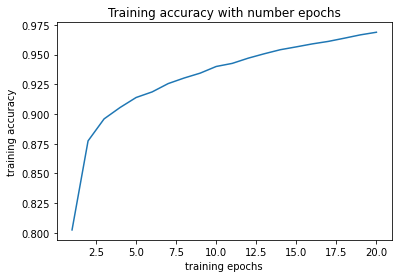

In [60]:
#plot the graph
x = list(range(1,21))
train_acc
plt.plot(x,train_acc)
plt.xlabel('training epochs')
plt.ylabel('training accuracy')
plt.title('Training accuracy with number epochs')